
Now, enter the data matrix row by row (each row should contain values separated by space):

Data Matrix (X):
 [[ 4. 11.]
 [ 8.  4.]
 [13.  5.]
 [ 7. 14.]]

Mean Vector:
 [8.  8.5]

Centered Data Matrix (X_centered):
 [[-4.   2.5]
 [ 0.  -4.5]
 [ 5.  -3.5]
 [-1.   5.5]]

Covariance Matrix:
 [[ 14. -11.]
 [-11.  23.]]

Eigenvalues:
 [ 6.61513568 30.38486432]

Eigenvectors:
 [[-0.83025082  0.55738997]
 [-0.55738997 -0.83025082]]

Sorted Eigenvalues:
 [30.38486432  6.61513568]

Sorted Eigenvectors (corresponding to sorted eigenvalues):
 [[ 0.55738997 -0.83025082]
 [-0.83025082 -0.55738997]]

Unit Eigenvectors:
 [[ 0.55738997 -0.83025082]
 [-0.83025082 -0.55738997]]

Selected Eigenvector for 1D PCA (Principal Component 1):
 [[ 0.55738997]
 [-0.83025082]]

1D Principal Component Projection Values:
 [[-4.30518692]
 [ 3.73612869]
 [ 5.69282771]
 [-5.12376947]]


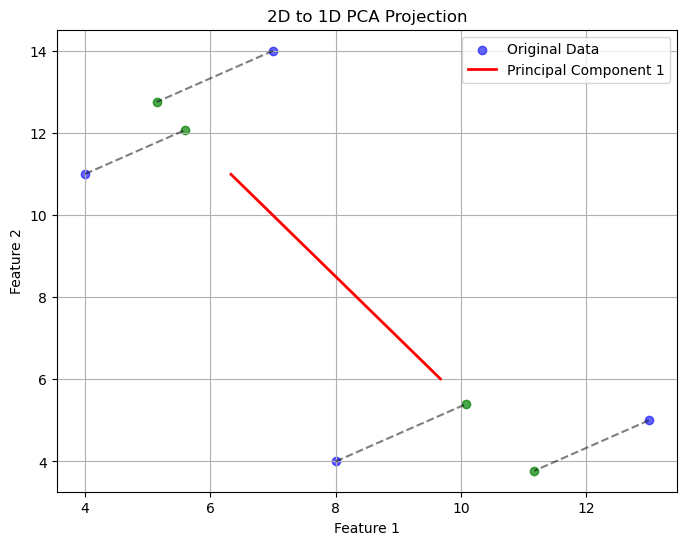

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n_samples = int(input("Enter the number of data samples: "))
n_features = int(input("Enter the number of features (columns): "))

print("\nNow, enter the data matrix row by row (each row should contain values separated by space):")
data = []
for i in range(n_samples):
    row = list(map(float, input(f"Enter values for row {i+1}: ").split()))
    data.append(row)

X = np.array(data)
print("\nData Matrix (X):\n", X)

mean_vector = np.mean(X, axis=0)
print("\nMean Vector:\n", mean_vector)

X_centered = X - mean_vector
print("\nCentered Data Matrix (X_centered):\n", X_centered)

covariance_matrix = np.cov(X_centered.T)
print("\nCovariance Matrix:\n", covariance_matrix)

eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print("\nEigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)

sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

print("\nSorted Eigenvalues:\n", sorted_eigenvalues)
print("\nSorted Eigenvectors (corresponding to sorted eigenvalues):\n", sorted_eigenvectors)

unit_eigenvectors = sorted_eigenvectors / np.linalg.norm(sorted_eigenvectors, axis=0)
print("\nUnit Eigenvectors:\n", unit_eigenvectors)

selected_vector = unit_eigenvectors[:, 0].reshape(-1, 1)
print("\nSelected Eigenvector for 1D PCA (Principal Component 1):\n", selected_vector)

X_pca_1d = X_centered.dot(selected_vector)
print("\n1D Principal Component Projection Values:\n", X_pca_1d)

plt.figure(figsize=(8, 6))

plt.scatter(X[:, 0], X[:, 1], color='blue', label='Original Data', alpha=0.6)

line_vector = selected_vector.flatten()
line_start = mean_vector - 3 * line_vector 
line_end = mean_vector + 3 * line_vector
plt.plot([line_start[0], line_end[0]], [line_start[1], line_end[1]], color='red', label='Principal Component 1', linewidth=2)

for i in range(n_samples):
    projection = mean_vector + X_pca_1d[i] * line_vector
    plt.plot([X[i, 0], projection[0]], [X[i, 1], projection[1]], 'k--', alpha=0.5)  
    plt.scatter(projection[0], projection[1], color='green', alpha=0.7)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D to 1D PCA Projection')
plt.legend()
plt.grid(True)
plt.show()